<a href="https://colab.research.google.com/github/frankfaisca/machine-learning/blob/main/ex3_balanceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libs

import numpy as np
import pickle
import pandas as pd
from sklearn import preprocessing
from sklearn import utils

from sklearn.utils import resample


#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization
%matplotlib inline
#static images of your plot embedded in the workbook

from sklearn.ensemble import GradientBoostingClassifier

#Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [2]:
# Load pickle file into train and test samples

outfilename = "/content/sample_data/A602.pickle"
file = open(outfilename , 'rb')
(X_train , y_train , X_val , y_val , X_test , y_test) = pickle.load(file)
print(f"Shapes: ", X_train.shape , X_val.shape , X_test.shape)

#transform array to dataframe

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_val = pd.DataFrame(X_val)
y_val = pd.DataFrame(y_val)
X_test = pd.DataFrame(X_test)
y_test = pd.DataFrame(y_test)


Shapes:  (10178, 24) (2565, 24) (765, 24)


In [3]:
# transform y to 0 and 1

y_train[0] = y_train.applymap(lambda x: 1 if x > 0 else x)
y_val[0] = y_val.applymap(lambda x: 1 if x > 0 else x)
y_test[0] = y_test.applymap(lambda x: 1 if x > 0 else x)



data/

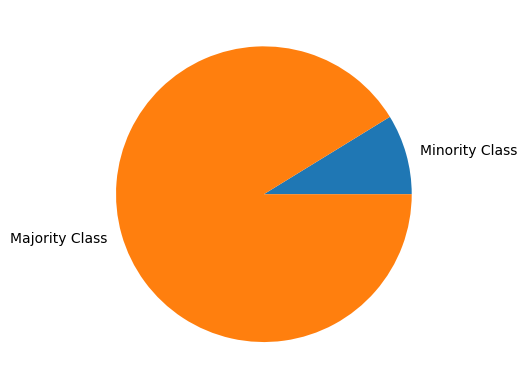

In [4]:
# plot a chart showing unbalance data

class_division = [ y_train[y_train[0] == 1 ].shape[0], y_train[y_train[0] == 0 ].shape[0] ]

my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()

In [5]:
# list each item of class division variable without balance

for item in class_division:
  print(item)

892
9286


In [6]:
# Oversampling

ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_Oversampled, y_Oversampled = ros.fit_resample(X_train, y_train)

In [7]:
# Y after OverSampled

y_Oversampled.value_counts()

0.0    9286
1.0    9286
dtype: int64

In [8]:
# Undersampling

ros = RandomUnderSampler(random_state=0)
ros.fit(X_train, y_train)
X_Undersampled, y_Undersampled = ros.fit_resample(X_train, y_train)

In [9]:
# Y after OverSampled

y_Undersampled.value_counts()

0.0    892
1.0    892
dtype: int64

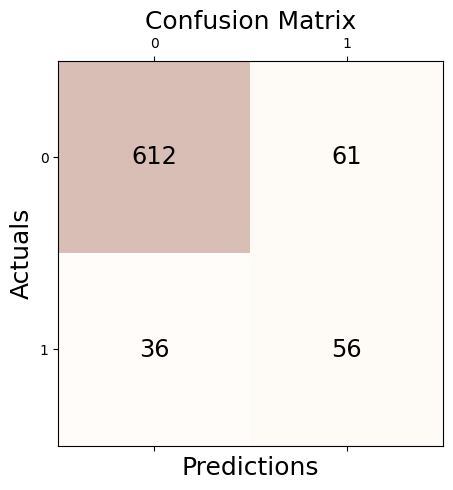

In [10]:
#GBR result normal
# Using r2 score and meand square error metrics instead of classification report because it is a Regressor Problem

gbr = GradientBoostingClassifier()
gbr.fit(X_train,y_train)
test = gbr.predict(X_test)

#Confusion matrix using Normal Data

conf_matrix = confusion_matrix(y_true=y_test, y_pred=test)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [11]:
precision_original =  round(precision_score(y_test, test), 4)
recall_original = round(recall_score(y_test, test), 4)
F1_score_original =  round(f1_score(y_test, test), 4)
metrics_original = [precision_original, recall_original, F1_score_original]

original = pd.DataFrame(metrics_original)
original.index = ['Precision', 'Recall', 'F1_score']
original.columns = ['Original Dataset']
original['Comments'] = ['Only 54% of the customers targetted are actually interested in renewing their insurance',
                       'Only 41% of the potentially interested customers are being identified',
                       '']
original

,Original Dataset,Comments
Precision,0.4786,Only 54% of the customers targetted are actual...
Recall,0.6087,Only 41% of the potentially interested custome...
F1_score,0.5359,


In [21]:
# Threshold

cols = ['Metrics', 'Original']
adj_threshold = pd.DataFrame()
adj_threshold['Original'] = metrics_original
thresholds = [ j/20 for j in range(1,16)]
for i in thresholds:

    y_pred_new_threshold = (gbr.predict_proba(X_test)[:,1]>=i).astype(int)

     #calculating the threshold with respect to class 1

    precision_adj_threshold =  round(precision_score(y_test, y_pred_new_threshold, average='binary'), 4)
    recall_adj_threshold = round(recall_score(y_test, y_pred_new_threshold, average='binary'), 4)
    F1_score_adj_threshold =  round((f1_score(y_test, y_pred_new_threshold, average='binary')), 4)
    metrics_adj_threshold = [precision_adj_threshold, recall_adj_threshold, F1_score_adj_threshold]
    name = 'Threshold: ' + str(i)
    adj_threshold[name] = metrics_adj_threshold
    cols.append(name)


adj_threshold.index = ['Precision', 'Recall', 'F1_score']
adj_threshold = adj_threshold.reset_index()
adj_threshold.columns = cols
adj_threshold.transpose()

adj_threshold1 = adj_threshold.transpose().iloc[1:, :]
adj_threshold1.columns = adj_threshold.iloc[:,0]
adj_threshold1


Metrics,Precision,Recall,F1_score
Original,0.2539,0.8913,0.3952
Threshold: 0.05,0.1272,1.0,0.2258
Threshold: 0.1,0.1454,0.9891,0.2535
Threshold: 0.15,0.1594,0.9565,0.2733
Threshold: 0.2,0.1743,0.9565,0.2948
Threshold: 0.25,0.1863,0.9457,0.3113
Threshold: 0.3,0.195,0.9348,0.3227
Threshold: 0.35,0.2044,0.913,0.334
Threshold: 0.4,0.2187,0.8913,0.3512
Threshold: 0.45,0.237,0.8913,0.3744


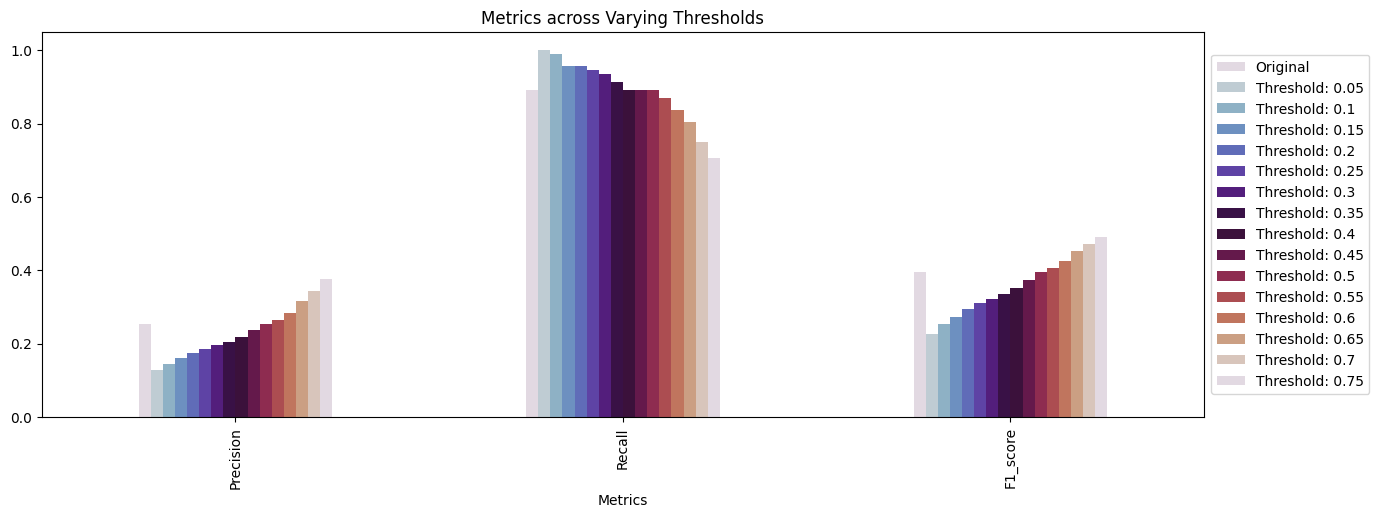

In [23]:
adj_threshold.plot(x='Metrics',
        kind='bar',
        stacked=False,
        title='Metrics across Varying Thresholds',
        figsize=(15, 5),
        cmap = 'twilight').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

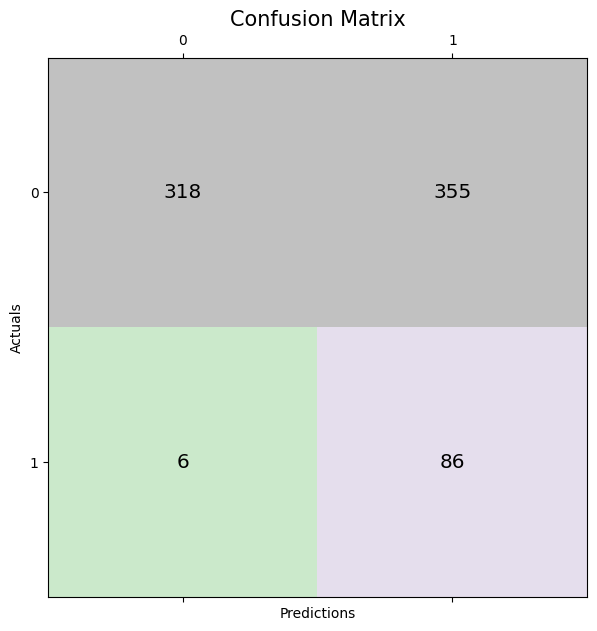

In [22]:
y_pred_new_threshold = (gbr.predict_proba(X_test)[:,1]>=0.3).astype(int)


conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_new_threshold)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

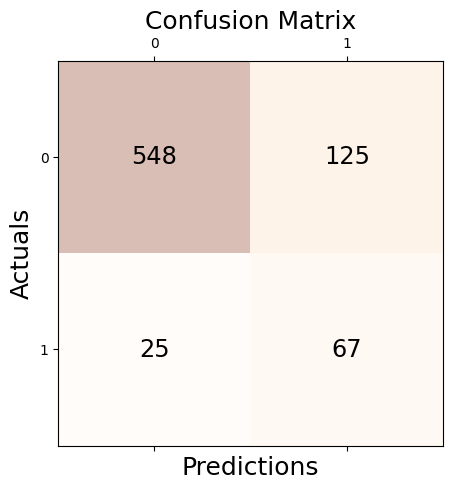

In [12]:
# GBR result with Oversampling

gbr = GradientBoostingClassifier()
gbr.fit(X_Oversampled,y_Oversampled)
test = gbr.predict(X_test)

# Confusion matrix using OverSampling

conf_matrix = confusion_matrix(y_true=y_test, y_pred=test)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [13]:
precision_original =  round(precision_score(y_test, test), 4)
recall_original = round(recall_score(y_test, test), 4)
F1_score_original =  round(f1_score(y_test, test), 4)
metrics_original = [precision_original, recall_original, F1_score_original]

original = pd.DataFrame(metrics_original)
original.index = ['Precision', 'Recall', 'F1_score']
original.columns = ['Original Dataset']
original['Comments'] = ['Only 54% of the customers targetted are actually interested in renewing their insurance',
                       'Only 41% of the potentially interested customers are being identified',
                       '']
original

,Original Dataset,Comments
Precision,0.3490,Only 54% of the customers targetted are actual...
Recall,0.7283,Only 41% of the potentially interested custome...
F1_score,0.4718,


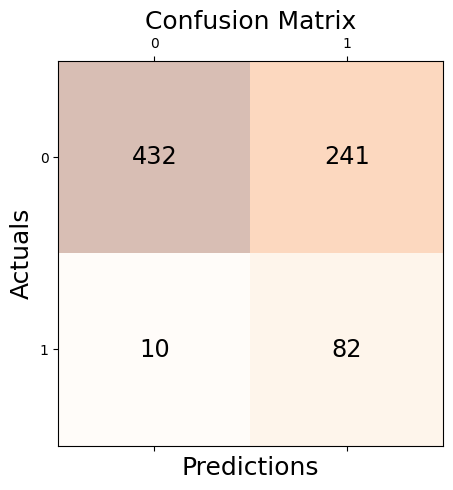

In [14]:
# GBR result with Undersampling
# Using r2 score and meand square error metrics instead of classification report because it is a Regressor Problem

gbr = GradientBoostingClassifier()
gbr.fit(X_Undersampled,y_Undersampled)
test = gbr.predict(X_test)

#Confusion matrix using UnderSampling

conf_matrix = confusion_matrix(y_true=y_test, y_pred=test)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [15]:
precision_original =  round(precision_score(y_test, test), 4)
recall_original = round(recall_score(y_test, test), 4)
F1_score_original =  round(f1_score(y_test, test), 4)
metrics_original = [precision_original, recall_original, F1_score_original]

original = pd.DataFrame(metrics_original)
original.index = ['Precision', 'Recall', 'F1_score']
original.columns = ['Original Dataset']
original['Comments'] = ['Only 54% of the customers targetted are actually interested in renewing their insurance',
                       'Only 41% of the potentially interested customers are being identified',
                       '']
original

,Original Dataset,Comments
Precision,0.2539,Only 54% of the customers targetted are actual...
Recall,0.8913,Only 41% of the potentially interested custome...
F1_score,0.3952,
